# Network inference of categorical variables: non-sequential data

In [1]:
import sys
import numpy as np
from scipy import linalg
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline

import inference

In [2]:
# setting parameter:
np.random.seed(1)

n = 20 # number of positions
m = 5 # number of values at each position
l = int(1*((n*m)**2)) # number of samples
g = 2.

sp = 0.5 # degree of sparsity
nm = n*m

In [3]:
w_true = inference.generate_interactions(n,m,g,sp)

In [4]:
h0_true = inference.generate_external_local_field(n,m,g)

In [5]:
s = inference.generate_sequences(w_true,h0_true,n,m,l)

('irepeat:', 0)
('irepeat:', 20)
('irepeat:', 40)
('irepeat:', 60)
('irepeat:', 80)


In [6]:
w,h0 = inference.fit_multiplicative(s,n,m)

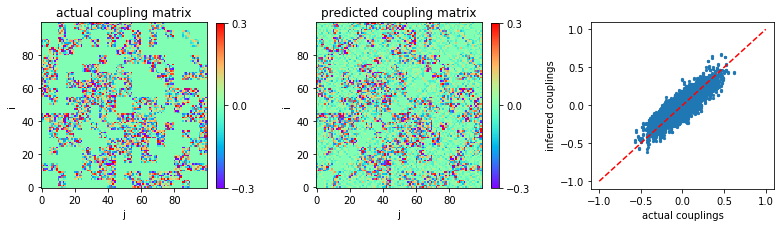

In [7]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w_true,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.3,0.3)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.3,0,0.3])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.3,0.3)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.3,0,0.3])

plt.subplot2grid((1,3),(0,2))
plt.plot([-1.,1.],[-1.,1.],'r--')
plt.scatter(w_true,w,marker='o',s=5)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()